In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(200,centers=2, cluster_std=[5,5])
#X,y = make_blobs([160,40], centers=None, cluster_std=[10,2])

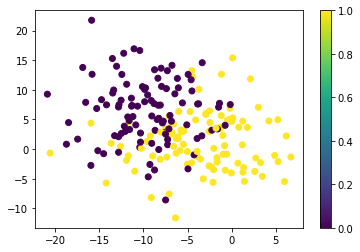

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1],c=y)
plt.colorbar()
plt.show()

In [ ]:
def getKNN(o, nbh, k):
  distances = []
  for n in nbh:
    xd = ( o[0] - n[0] ) ** 2
    yd = ( o[1] - n[1] ) ** 2
    d = np.sqrt( xd + yd )
    distances.append( [d, n[2] ] )

  distances.sort( key = lambda p : p[0] )

  neighbours = [n[1] for n in distances]

  return neighbours[:k]
    

In [ ]:
def classify(neighbours):
  votes = [0,0]
  for n in neighbours:
    if n == 0:
      votes[0] += 1
    else:
      votes[1] +=1

  if votes[0] > votes[1]:
    return 0
  elif votes[1] > votes[0]:
    return 1
  else:
    return np.random.randint(0,2)

In [ ]:
data = np.zeros((len(X),3))
data[:,:2] = X
data[:,2] = y

In [ ]:
k = 15
nz = getKNN([-3,-3], data, k)
#print(classify(nz))
cl, pr = probability(nz)
print("classification: ", cl)
print("probability: ", pr)

moe = 1.96 * np.sqrt(  pr * (1-pr) / k )
lp, up = np.max([0,pr-moe]), np.min([1,pr+moe])

print("probability range: [", lp, ", ", up, "]")

classification:  1
probability:  0.8
probability range: [ 0.5975720704382257 ,  1.0 ]


In [ ]:
def probability(neighbours):
  votes = [0,0]
  for n in neighbours:
    if n == 0:
      votes[0] += 1
    else:
      votes[1] +=1
    
  k = len(neighbours)

  if votes[0] > votes[1]:
    return (0,votes[0]/k)
  elif votes[1] > votes[0]:
    return (1,votes[1]/k)
  else:
    return (np.random.randint(0,2),0.5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  4]
 [ 3  6]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.60      0.67      0.63         9

    accuracy                           0.82        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.83      0.82      0.83        40



In [ ]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

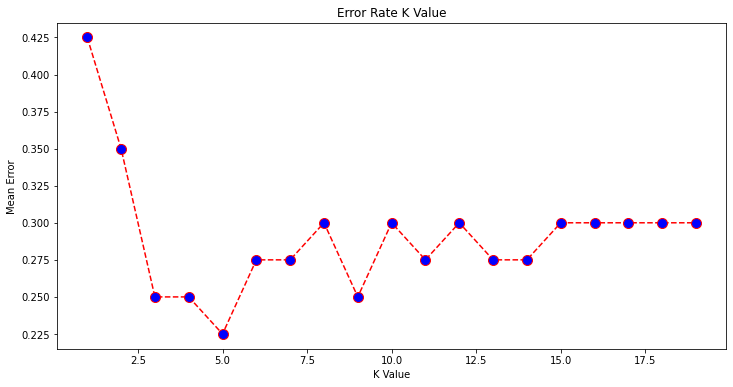

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')